# Equilibrium

#### Written for the CBC QuantEcon Workshop (September 2022)
#### Author: [John Stachurski](http://johnstachurski.net/)

In this notebook we solve a very simple market equilibrium problem.

Supply and demand are nonlinear and we use Newton's root-finding algorithm to solve for equilibrium prices.

We use the following imports:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Prelude: A Note on Root-Finding

If $f$ maps an interval $(a, b)$ into $\mathbb R$, then a **root** of the function $f$ is an $x^* \in (a,b)$ with $f(x^*)=0$.

A common method for root finding is Newton's algorithm.

We start with a guess $x_0 \in (a, b)$.

Then we replace $f$ with the tangent function $f_a(x) = f(x_0) + f'(x_0)(x - x_0)$ and solve for the root of $f_a$ (which can be done exactly).

In other words, we solve the simple equation $f_a(x)=0$ to get 

$$ x_1 = x_0 - \frac{f(x_0)}{f'(x_0)} $$

Then we repeat to get $x_2, x_3, \ldots$

The algorithm is implemented in `scipy.optimize`

In [3]:
from scipy.optimize import newton

Let's apply this to find the positive root of $f(x) = x^2 - 1$.

We will use a `lambda` expression to create the function $f$.

In [4]:
newton(lambda x: x**2 - 1, 0.5)

1.0000000000000002

Here we didn't supply the gradient of $f(x)=x-1$ so it was approximated numerically.  We can supply it as follows:

In [5]:
newton(lambda x: x**2 - 1, 0.5, fprime=lambda x: 2*x)

1.0

## The Market

Now let's consider a market for coffee beans.  The price per kilo is $p$.  Total supply at price $p$ is

$$ q_s (p) = b \sqrt{p} $$

and total demand is 

$$ q_d (p) = a \exp(-p) + c, $$

where $a, b$ and $c$ are positive parameters.

Now we write routines to compute supply and demand as functions of price and parameters.

We take $a=1$, $b=0.5$ and $c=1$ as "default" parameter values.

In [14]:
def supply(p, b=0.5):
    return b * np.sqrt(p)

def demand(p, a=1, c=1):
    return a * np.exp(-p) + c

Now we can call the functions as follows:

In [15]:
demand(2.0)  # with a and c at defaults

1.1353352832366128e+00

In [16]:
demand(2.0, a=0.4)  # a is specified and c remains at its defaults

1.0541341132946451e+00

etc.

Note that these functions are automatically NumPy "universal functions":

In [19]:
p_vals = np.array((0.5, 1.0, 1.5))
supply(p_vals)

array([0.35355339, 0.5       , 0.61237244])

In [20]:
demand(p_vals)

array([1.60653066, 1.36787944, 1.22313016])

### Exercise 1

Plot both supply and demand as functions of $p$ on the interval $[0, 10]$ at the default parameters.

* Put price on the horizonal axis.  
* Use a legend to label the two functions and be sure to label the axes.  
* Make a rough estimate of the equilibrium price, where demand equals supply.

In [26]:
# Put your code here

In [27]:
for _ in range(10):
    print('solution below')

solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below


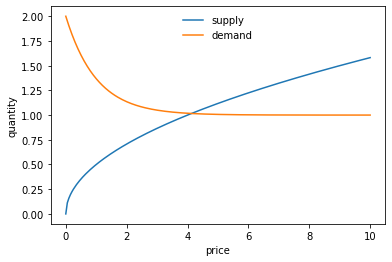

In [28]:
fig, ax = plt.subplots()
p_grid = np.linspace(0, 10, 200)
ax.plot(p_grid, supply(p_grid), label='supply')
ax.plot(p_grid, demand(p_grid), label='demand')
ax.set_xlabel("price")
ax.set_ylabel("quantity")
ax.legend(frameon=False, loc='upper center')
plt.show()

The equilibrium price looks to be about 4.1.

### Exercise 2

Write a function that takes arguments $a, b, c, p$, with default values $a=1$, $b=0.5$ and $c=1$, and returns *excess demand*, which is defined as

$$ e(p) = q_d(p) - q_s(p) $$

In [29]:
# Put your code here

In [30]:
for _ in range(10):
    print('solution below')

solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below


In [31]:
def excess_demand(p, a=1, b=0.5, c=1):
    return demand(p, a, c) - supply(p, b)

Now we test it:

In [32]:
excess_demand(1.0)

8.678794411714423e-01

### Organizing our Code

If we have many functions working with the same parameters, it's hard to know where to put the default values.

As such, we normally collect them in a data structure, such as a class or a tuple.

Personally, I normally used `namedtuple` instances, which are lighter than classes but easier to work with than tuples.

Here's an example:

In [33]:
from collections import namedtuple

Params = namedtuple('Params', ('a', 'b', 'c'))

def create_market_params(a=1.0, b=0.5, c=1.0):
    return Params(a=a, b=b, c=c)


def supply(p, params):
    a, b, c = params
    return b * np.sqrt(p)

def demand(p, params):
    a, b, c = params
    return a * np.exp(-p) + c

def excess_demand(p, params):
    a, b, c = params
    return demand(p, params) - supply(p, params)

### Exercise 3

Using these functions, plot excess demand over the interval from $0.2$ up to $10$.  Also plot a horizontal line at zero.  The equilibrium price is where excess demand crosses zero.

In [34]:
# Put your code here

In [35]:
for _ in range(10):
    print('solution below')

solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below


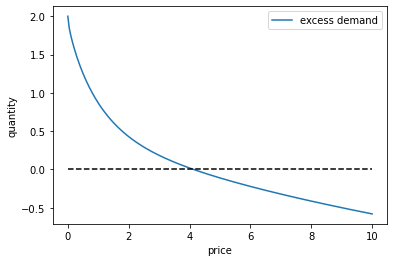

In [36]:
params = create_market_params()

fig, ax = plt.subplots()
p_grid = np.linspace(0, 10, 200)
ax.plot(p_grid, excess_demand(p_grid, params), label='excess demand')
ax.plot(p_grid, np.zeros_like(p_grid), 'k--')
ax.set_xlabel("price")
ax.set_ylabel("quantity")
ax.legend()
plt.show()

### Exercise 4

Write a function that takes an instance of `Params` (i.e, a parameter vector) and returns a market clearing price via Newton's method.

In [37]:
# Put your code here

In [38]:
for _ in range(10):
    print('solution below')

solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below


In [39]:
def compute_equilibrium(params, price_init=2.0):
    p_star = newton(lambda p: excess_demand(p, params), price_init)
    return p_star

In [40]:
params = create_market_params()
compute_equilibrium(params)

4.129732625744951e+00

This looks about right given the figures above.

### Exercise 5

For $b$ in a grid of 200 values between 0.5 and 1.0, plot the equilibrium price for each $b$.

Does the curve that you plotted slope up or down?  Try to provide an explanation for what you see in terms of market equilibrium.

In [41]:
# Put your code here

In [42]:
for _ in range(10):
    print('solution below')

solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below


In [46]:
b_grid = np.linspace(0.5, 1.0, 200)
prices = np.empty_like(b_grid)
for i, b in enumerate(b_grid):
    params = create_market_params(b=b)
    prices[i] = compute_equilibrium(params)

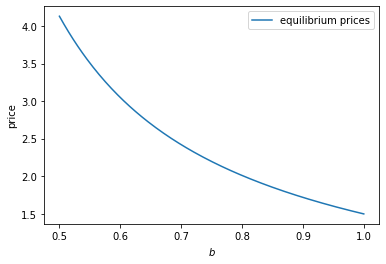

In [47]:
fig, ax = plt.subplots()
ax.plot(b_grid, prices, label="equilibrium prices")
ax.set_xlabel("$b$")
ax.set_ylabel("price")
ax.legend()
plt.show()

The curve slopes down because an increase in $b$ pushes up supply at any given price.  (In other words, the supply curve shifts up.)  

With greater supply, the price tends to fall.